In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import nltk
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Downloading NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Abhijeet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abhijeet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Abhijeet\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
df = pd.read_csv(r"C:\Users\Abhijeet\Desktop\ODA\python_prog\Notebooks\data\Restaurant_Reviews.csv")

In [6]:
# Display first few rows of the dataset
print(df.head())

                                              Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1


In [7]:
# Check for missing values
print(df.isnull().sum())

Review    0
Liked     0
dtype: int64


In [11]:
def cleaning_text(text):
    text = text.lower()
    text = re.sub(r'[\d+]', '',text)
    text = re.sub(f'[{string.punctuation}]', '', text)
    text = re.sub(r'[\s+]', ' ', text)
    return text

In [13]:
df['Cleaned Review'] = df['Review'].apply(cleaning_text)

In [14]:
df

,Review,Liked,Cleaned Review
0,Wow... Loved this place.,1,wow loved this place
1,Crust is not good.,0,crust is not good
2,Not tasty and the texture was just nasty.,0,not tasty and the texture was just nasty
3,Stopped by during the late May bank holiday of...,1,stopped by during the late may bank holiday of...
4,The selection on the menu was great and so wer...,1,the selection on the menu was great and so wer...
...,...,...,...
995,I think food should have flavor and texture an...,0,i think food should have flavor and texture an...
996,Appetite instantly gone.,0,appetite instantly gone
997,Overall I was not impressed and would not go b...,0,overall i was not impressed and would not go back
998,"The whole experience was underwhelming, and I ...",0,the whole experience was underwhelming and i t...


In [15]:
stop_words = set(stopwords.words('english'))

In [16]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [19]:
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

# Apply preprocessing
df['processed_review'] = df['Cleaned Review'].apply(preprocess_text)

# Check the processed text
print(df['processed_review'].head())

0                                      wow loved place
1                                           crust good
2                                  tasty texture nasty
3    stopped late may bank holiday rick steve recom...
4                           selection menu great price
Name: processed_review, dtype: object


In [21]:
# Vectorizing the text using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)

X = tfidf.fit_transform(df['processed_review'])  # Features (TF-IDF representation)
y = df['Liked']  # Target (Sentiment labels)

# Encode target labels if they are categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shape of the splits
print(X_train.shape, X_test.shape)

(700, 1808) (300, 1808)


### Naive Bayes Model

In [23]:
# Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predictions
y_pred_nb = nb_model.predict(X_test)

# Evaluation
print("Naive Bayes Model Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Model Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       152
           1       0.75      0.82      0.79       148

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



### Logistic Regression Model

In [24]:
# Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluation
print("Logistic Regression Model Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Model Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       152
           1       0.81      0.73      0.77       148

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



### Support Vector Machine (SVM) Model

In [25]:
# SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluation
print("SVM Model Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Model Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       152
           1       0.81      0.76      0.78       148

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79       300
weighted avg       0.79      0.79      0.79       300



### Model Evaluation
#### Confusion Matrix

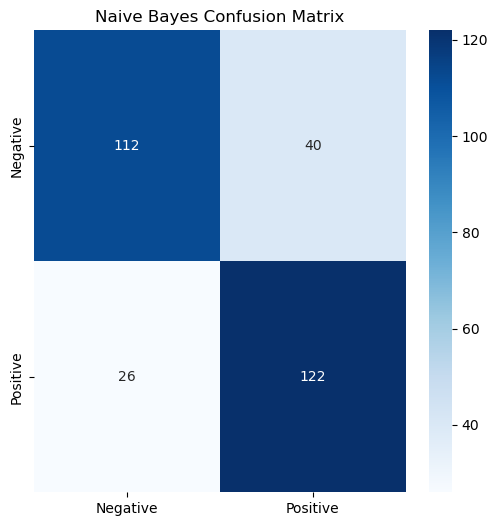

In [26]:
# Confusion Matrix for Naive Bayes
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Naive Bayes Confusion Matrix')
plt.show()

### Word Cloud for Positive and Negative Reviews

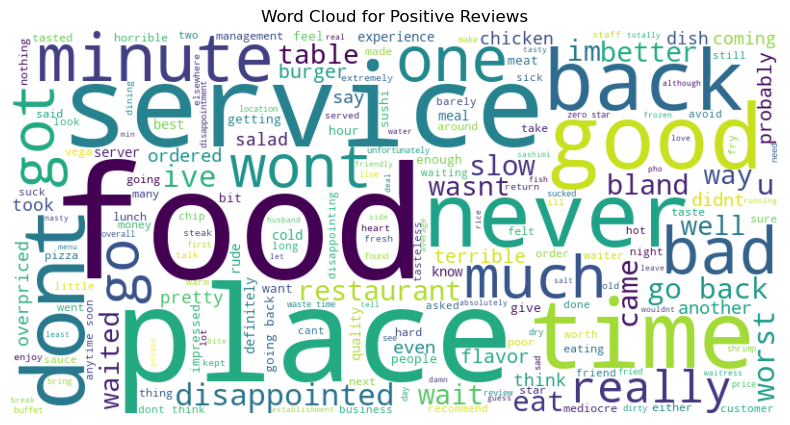

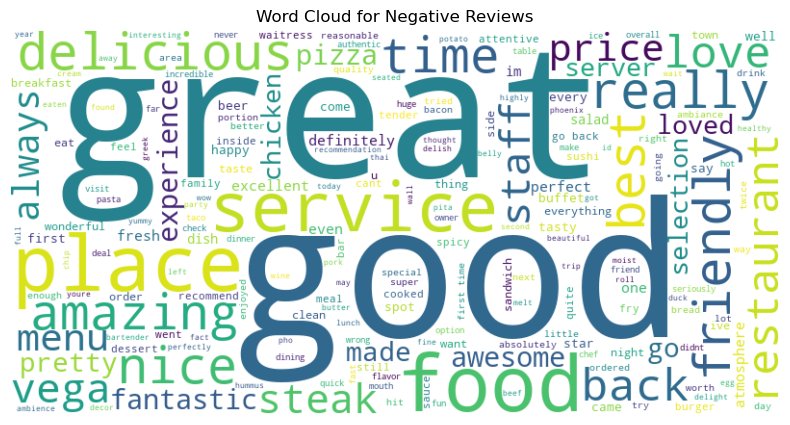

In [31]:
# Word Cloud for positive reviews
positive_reviews = ' '.join(df[df['Liked'] == 0]['processed_review'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show('\n+')

# Word Cloud for negative reviews
negative_reviews = ' '.join(df[df['Liked'] == 1]['processed_review'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()

In [101]:
a = "abc123def456gh789"

In [104]:
re.sub(r'[A-Za-z]', "", a)

'123456789'

In [62]:
[int(num) for num in re.findall(r'\d+', a)]

[123, 456, 789]

In [70]:
[word for word in [re.sub(r'\d+', '', a)]]

['abcdefgh']

In [71]:
def cleaning_alpha_num(text):
    remove_nmn = [word for word in [re.sub(r'\d+', '', a)]]
    remove_text = [int(num) for num in re.findall(r'\d+', a)]
    return remove_nmn, remove_text

print(cleaning_alpha_num(a))

(['abcdefgh'], [123, 456, 789])


In [81]:
def count_words(s):
    return len([word for word in s.split() if word.()])

# Test the function
print(count_words("Hello World 123"))  # Output: 3


2


In [92]:
words = "Hello World 123 456"

In [77]:
words = len([w for w in words.split() if w.isapl()])
words

2

In [102]:
number = re.findall(r'\d', a)

# for i in number:
#     print(i)

print(number)

['1', '2', '3', '4', '5', '6', '7', '8', '9']
